# Case Study  Time Series Model

Requirement - Time-Series Model:

Transform the provided record-level dataset into a time-series model. The main objective of this model is to gain insights into the temporal patterns of vehicle listings, with a particular emphasis on conducting an inventory analysis over time, segmented by regions. For instance, the model should facilitate the creation of a time-series chart that represents the number of available vehicles over time, filtered by specific criteria such as region, vehicle type, etc. This will aid in understanding regional demand-supply dynamics, seasonal trends, and other relevant insights. (Python notebook)

Necessary Libraries Needed

dateutil.parser import parse<br> 
matplotlib as mpl<br>
matplotlib.pyplot as plt<br>
seaborn as sns<br>
numpy as np<br>
pandas as pd<br>
statsmodels.tsa seasona_decompose<br>
ARIMA<br>

In [542]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

from datetime import datetime
date_parser=lambda x:datetime.striptime(x, "%y-%m-%d")
df = pd.read_csv('/Users/piperesguerra/Athena Case Study/craiglist_ver2.csv', index_col=0)
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,size,type,paint_color,county,state,lat,long,posting_date,removal_date,month
id,,,,,,,,,,,,,,,,,,,,,
7307679724,abilene,4500,2002-01-01,bmw,x5,NaN,NaN,gas,184000.0,clean,...,NaN,NaN,NaN,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00,4.0
7311833696,abilene,4500,2002-01-01,bmw,x5,NaN,NaN,gas,184000.0,clean,...,NaN,NaN,NaN,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00,4.0
7311441996,abilene,4900,2006-01-01,toyota,camry,excellent,4 cylinders,gas,184930.0,clean,...,NaN,sedan,silver,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00,4.0
7307680715,abilene,6500,2008-01-01,ford,expedition,NaN,NaN,gas,206000.0,clean,...,NaN,NaN,NaN,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00,4.0
7311834578,abilene,6500,2008-01-01,ford,expedition,NaN,NaN,gas,206000.0,clean,...,NaN,NaN,NaN,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00,4.0


In [543]:
import pandas as pd

df["posting_date"] = pd.to_datetime(df["posting_date"], format="%Y-%m-%d %H:%M:%S").dt.tz_localize(None)
df["removal_date"] = pd.to_datetime(df["removal_date"], format="%Y-%m-%d %H:%M:%S").dt.tz_localize(None)
df["year"] = pd.to_datetime(df["year"], format="%Y-%m")

df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,size,type,paint_color,county,state,lat,long,posting_date,removal_date,month
id,,,,,,,,,,,,,,,,,,,,,
7307679724,abilene,4500,2002-01-01,bmw,x5,NaN,NaN,gas,184000.0,clean,...,NaN,NaN,NaN,NaN,tx,32.401556,-99.884713,2021-04-16,2021-05-02,4.0
7311833696,abilene,4500,2002-01-01,bmw,x5,NaN,NaN,gas,184000.0,clean,...,NaN,NaN,NaN,NaN,tx,32.401556,-99.884713,2021-04-24,2021-04-28,4.0
7311441996,abilene,4900,2006-01-01,toyota,camry,excellent,4 cylinders,gas,184930.0,clean,...,NaN,sedan,silver,NaN,tx,32.453848,-99.787900,2021-04-23,2021-05-25,4.0
7307680715,abilene,6500,2008-01-01,ford,expedition,NaN,NaN,gas,206000.0,clean,...,NaN,NaN,NaN,NaN,tx,32.401556,-99.884713,2021-04-16,2021-04-26,4.0
7311834578,abilene,6500,2008-01-01,ford,expedition,NaN,NaN,gas,206000.0,clean,...,NaN,NaN,NaN,NaN,tx,32.401556,-99.884713,2021-04-24,2021-05-12,4.0


In [544]:
import pandas as pd

df["posting_year"] = pd.to_datetime(df["posting_date"], format="%Y-%m").dt.tz_localize(None)
df.set_index("posting_year", inplace=True)
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,size,type,paint_color,county,state,lat,long,posting_date,removal_date,month
posting_year,,,,,,,,,,,,,,,,,,,,,
2021-04-16,abilene,4500,2002-01-01,bmw,x5,NaN,NaN,gas,184000.0,clean,...,NaN,NaN,NaN,NaN,tx,32.401556,-99.884713,2021-04-16,2021-05-02,4.0
2021-04-24,abilene,4500,2002-01-01,bmw,x5,NaN,NaN,gas,184000.0,clean,...,NaN,NaN,NaN,NaN,tx,32.401556,-99.884713,2021-04-24,2021-04-28,4.0
2021-04-23,abilene,4900,2006-01-01,toyota,camry,excellent,4 cylinders,gas,184930.0,clean,...,NaN,sedan,silver,NaN,tx,32.453848,-99.787900,2021-04-23,2021-05-25,4.0
2021-04-16,abilene,6500,2008-01-01,ford,expedition,NaN,NaN,gas,206000.0,clean,...,NaN,NaN,NaN,NaN,tx,32.401556,-99.884713,2021-04-16,2021-04-26,4.0
2021-04-24,abilene,6500,2008-01-01,ford,expedition,NaN,NaN,gas,206000.0,clean,...,NaN,NaN,NaN,NaN,tx,32.401556,-99.884713,2021-04-24,2021-05-12,4.0


-----

# Understanding the data we have:

__Manufacturers / Cars Brands__

1. How many cars are being listed on a year, month and date basis?<br> 
2. What are the different Manufactures that are shown in the file?<br> 
3. What are the prices for these cars? If too large to show, get at least the 10 manufacturers?<br>
4. What are the conditions of these cars?<br>
5. What is the year model of these cars?<br> 
6. What is the type of these cars up for listing? Sedan, pickup etc?<br>


__These are different cars that will be up for sale daily from April to May 2021.__

In [545]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd


manufacturer_count = df.groupby(['posting_year', 'manufacturer']).size().reset_index(name='count')

manufacturer_count_pivot = manufacturer_count.pivot_table(index='posting_year', columns='manufacturer', values='count', fill_value=0)


print(manufacturer_count_pivot)

manufacturer  acura  alfa-romeo  aston-martin  audi   bmw  buick  cadillac  \
posting_year                                                                 
2021-04-04      172          65             0   189   107     87       107   
2021-04-05      305          18             0   256   212    172       146   
2021-04-06      117          39             0   168   276    160       176   
2021-04-07       62          17             0    87   268     90       111   
2021-04-08      111          80             0   175   383    142       235   
2021-04-09       88           4             2   106   513    102       127   
2021-04-10       88           3             1   132   192     91       128   
2021-04-11      162          68             0   232   336     77       131   
2021-04-12      260          58             1   228   262    170       178   
2021-04-13      269          14             0   274   255    171       144   
2021-04-14      145          42             0   198   358    180

posting_year
2021-04-04    37
2021-04-05    39
2021-04-06    39
2021-04-07    38
2021-04-08    37
2021-04-09    41
2021-04-10    39
2021-04-11    39
2021-04-12    39
2021-04-13    39
2021-04-14    39
2021-04-15    39
2021-04-16    41
2021-04-17    39
2021-04-18    37
2021-04-19    41
2021-04-20    40
2021-04-21    40
2021-04-22    39
2021-04-23    39
2021-04-24    38
2021-04-25    40
2021-04-26    41
2021-04-27    40
2021-04-28    40
2021-04-29    38
2021-04-30    41
2021-05-01    41
2021-05-02    41
2021-05-03    40
2021-05-04    40
2021-05-05    37
Name: manufacturer, dtype: int64


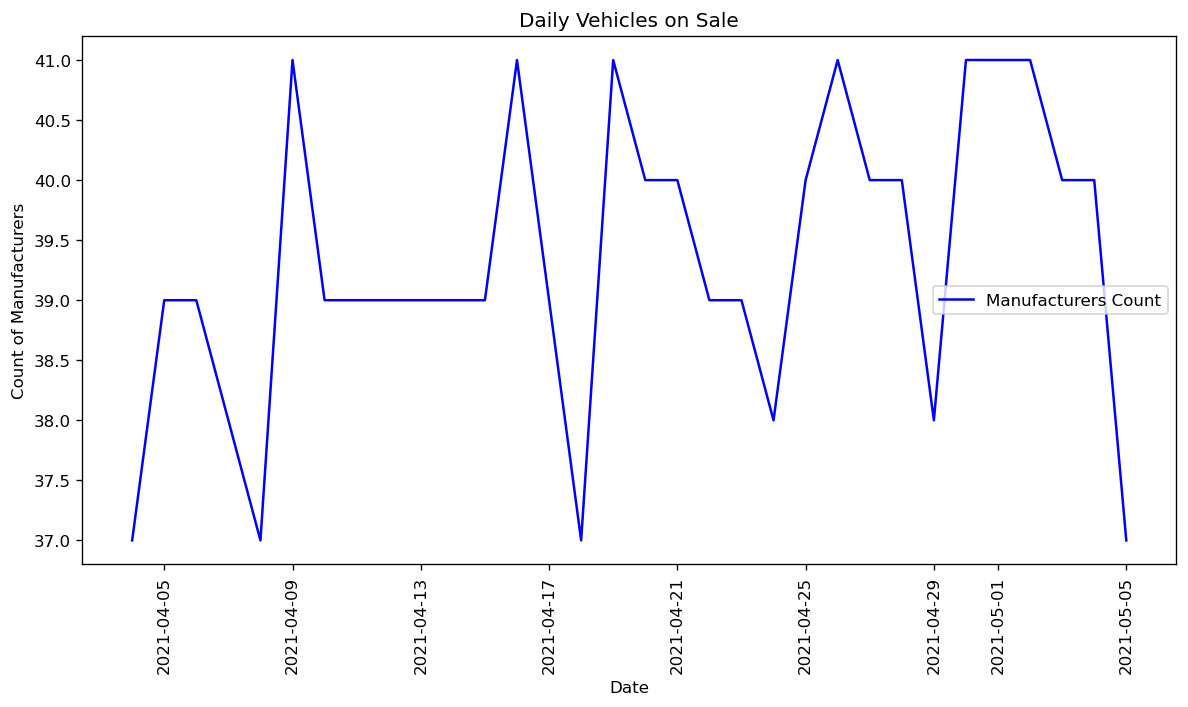

In [546]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd


manufacturers_count_per_day = df['manufacturer'].resample('D').nunique()
print(manufacturers_count_per_day)

plt.figure(figsize=(10, 6)) 

plt.plot(manufacturers_count_per_day.index, manufacturers_count_per_day.values, label='Manufacturers Count', color='blue')

plt.xlabel('Date')
plt.ylabel('Count of Manufacturers')
plt.title('Daily Vehicles on Sale')
plt.legend()

plt.xticks(rotation=90) 
plt.tight_layout() 

plt.show()

manufacturer
acura                854.000000
alfa-romeo           128.142857
aston-martin           3.428571
audi                1081.857143
bmw                 2099.857143
buick                785.857143
cadillac             993.285714
chevrolet           7866.285714
chrysler             861.571429
datsun                 9.000000
dodge               1958.142857
ferrari               13.571429
fiat                 113.142857
ford               10140.714286
gmc                 2397.857143
harley-davidson       21.857143
honda               3038.428571
hyundai             1476.857143
infiniti             686.000000
jaguar               278.000000
jeep                2716.285714
kia                 1208.142857
land rover             4.200000
lexus               1171.428571
lincoln              602.857143
mazda                775.285714
mercedes-benz       1688.142857
mercury              169.142857
mini                 339.428571
mitsubishi           470.285714
morgan                 3.00

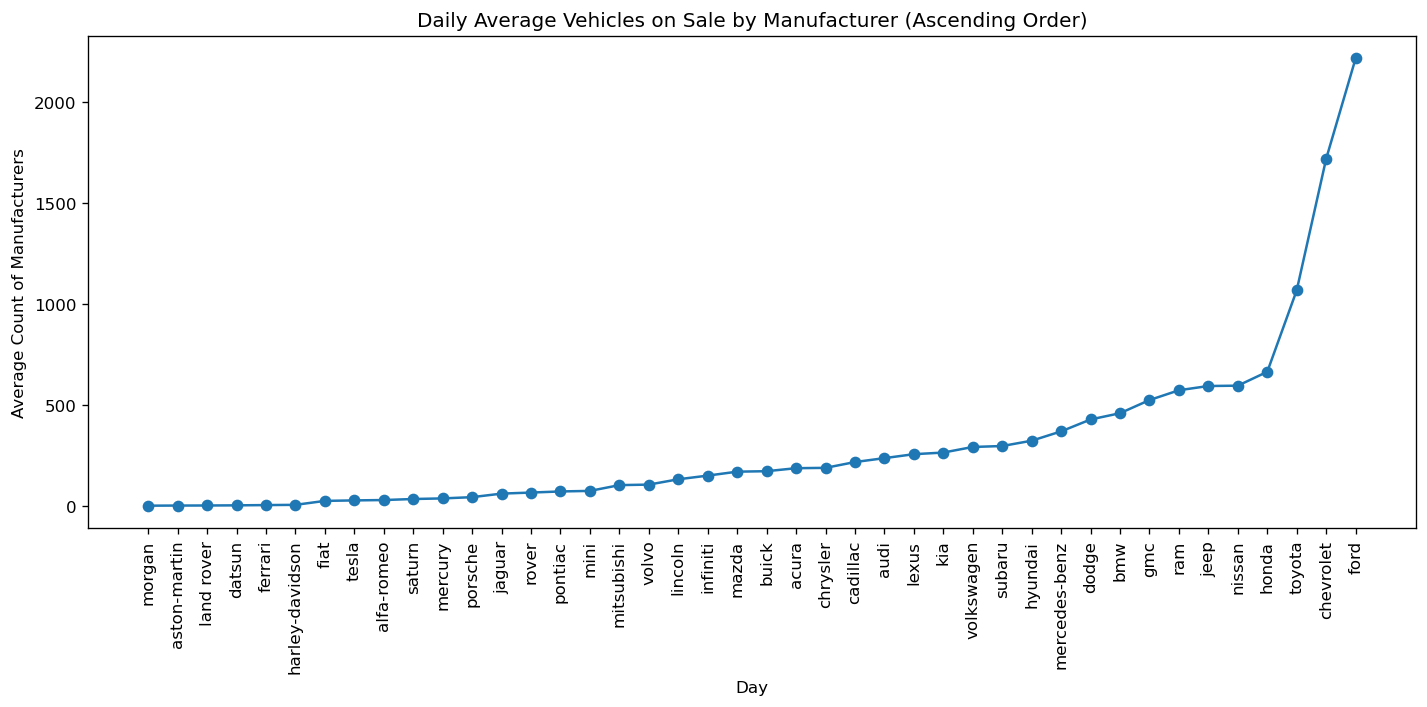

In [548]:
import matplotlib.pyplot as plt
import pandas as pd

df['posting_date'] = pd.to_datetime(df['posting_date'])
df['day'] = df['posting_date'].dt.date

# Group by 'day' and 'manufacturer', and calculate the count
# Pivot the data to have 'day' as rows, 'manufacturer' as columns, and 'count' as values

daily_counts = df.groupby(['day', 'manufacturer']).size().reset_index(name='count')
daily_counts_pivot = daily_counts.pivot(index='day', columns='manufacturer', values='count')

# Calculate the average count per day for each manufacturer
# Sort the manufacturers based on average count in ascending order

daily_counts_mean = daily_counts_pivot.mean(axis=0)
daily_counts_mean_sorted = daily_counts_mean.sort_values(ascending=True)

# Plot the daily average count in ascending order
plt.figure(figsize=(12, 6))
plt.plot(daily_counts_mean_sorted.index, daily_counts_mean_sorted.values, marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Average Count of Manufacturers')
plt.title('Daily Average Vehicles on Sale by Manufacturer (Ascending Order)')
plt.xticks(rotation=90)
plt.tight_layout()

print(daily_average_count)

plt.show()


### The Top 10 most car being put up on sale are

toyota<br> 
chevrolet<br> 
mercedes-benz<br> 
jeep<br> 
ford<br>

volvo<br> gmc<br> ram<br> bmw<br> nissan<br>

In [549]:
import pandas as pd


res = df.groupby([df["posting_date"].dt.year, "manufacturer",])["price"].sum()

res = res.sort_values(ascending=False)

print(res)

posting_date  manufacturer   
2021.0        toyota             8013346735
              chevrolet          6369588861
              mercedes-benz      6283223656
              jeep               2865748623
              ford               2584685804
              volvo              1294789869
              gmc                 510362648
              ram                 508593197
              bmw                 393055103
              nissan              358980755
              honda               228670755
              dodge               205648870
              buick               202354036
              audi                178532339
              lexus               157490452
              cadillac            135162989
              subaru              123962092
              acura               118620674
              volkswagen          117159188
              hyundai             110819839
              infiniti             93936000
              kia                  93731678
  

In [550]:
import pandas as pd

res = df.groupby([df["posting_date"].dt.month, "manufacturer"])["price"].sum()

res = res.sort_values(ascending=False)

April = res[res.index.get_level_values(0) == 4]

print(April)

posting_date  manufacturer   
4.0           toyota             7862486071
              mercedes-benz      6214098301
              chevrolet          3968570648
              jeep               2783011789
              ford               2162490331
              volvo              1283904432
              gmc                 411910448
              ram                 389021217
              bmw                 325320414
              nissan              291444322
              buick               188024680
              honda               162846245
              dodge               155849914
              audi                144415757
              lexus               122807662
              cadillac            105976763
              acura                98335011
              subaru               85418391
              infiniti             80373438
              volkswagen           80371107
              hyundai              79066770
              lincoln              71844164
  

In [551]:
import pandas as pd

df.groupby(
    [df["posting_date"].dt.month, "region", "manufacturer"])["price"].sum()

posting_date  region                  manufacturer
4.0           abilene                 bmw               18985
                                      buick             26500
                                      chevrolet       4325120
                                      chrysler          15000
                                      dodge            101000
                                                       ...   
5.0           zanesville   cambridge  mazda             31590
                                      ram               32990
                                      subaru            32590
                                      toyota            27990
                                      volkswagen        27590
Name: price, Length: 20625, dtype: int64

<font color=blue>__In this section, Identify the numbers of car manufacturers for sale and filter based on the car condition column.__ </font>

We can change the selection.

In [552]:
df['type'].unique()

array([nan, 'sedan', 'SUV', 'mini-van', 'pickup', 'truck', 'coupe',
       'hatchback', 'convertible', 'other', 'wagon', 'van', 'offroad',
       'bus'], dtype=object)

In [553]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


new_condition_df = df[df['type'] == 'sedan']

count_new = new_condition_df.groupby('manufacturer').size()
count_new = count_new.sort_values(ascending=False)

fig = px.bar(count_new, x=count_new.index, y=count_new.values, color=count_new.index,
             labels={'x': 'Manufacturer', 'y': 'Count'}, title='Count of Unique Manufacturers base on Condition')

fig.show()
print(count_new)

manufacturer
toyota             7699
honda              7222
chevrolet          6873
ford               6068
nissan             5786
bmw                5666
hyundai            4747
mercedes-benz      4381
volkswagen         3747
lexus              3446
audi               3079
dodge              2824
kia                2601
cadillac           2443
chrysler           2264
subaru             2233
acura              2112
lincoln            1787
buick              1677
infiniti           1555
mazda              1395
volvo              1269
jaguar              805
tesla               644
pontiac             610
mercury             468
mitsubishi          427
alfa-romeo          294
saturn              286
mini                120
porsche             102
jeep                 31
fiat                 17
ram                  16
gmc                  13
land rover           10
rover                 6
aston-martin          3
harley-davidson       2
ferrari               1
dtype: int64


In [554]:
df['title_status'].unique()

array(['clean', 'missing', 'lien', 'rebuilt', 'salvage', nan,
       'parts only'], dtype=object)

In [555]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


new_condition_df = df[df['title_status'] == 'clean']

count_new = new_condition_df.groupby('manufacturer').size()
count_new = count_new.sort_values(ascending=False)

fig = px.bar(count_new, x=count_new.index, y=count_new.values, color=count_new.index,
             labels={'x': 'Manufacturer', 'y': 'Count'}, title='Count of Unique Manufacturers base on Condition')

fig.show()
print(count_new)

manufacturer
ford               67834
chevrolet          52413
toyota             32370
honda              19709
jeep               18065
nissan             17539
ram                17496
gmc                16099
bmw                14195
dodge              12834
mercedes-benz      11387
hyundai             9803
volkswagen          8912
subaru              8701
kia                 8085
lexus               7948
audi                7332
cadillac            6526
acura               5745
chrysler            5669
buick               5199
mazda               5122
infiniti            4602
lincoln             4025
volvo               3274
mitsubishi          3119
mini                2289
pontiac             2155
rover               2008
jaguar              1902
porsche             1332
mercury             1133
saturn              1048
alfa-romeo           892
tesla                821
fiat                 760
harley-davidson      150
ferrari               89
datsun                60
aston-martin

In [556]:
df['condition'].unique()

array([nan, 'excellent', 'good', 'like new', 'fair', 'new', 'salvage'],
      dtype=object)

In [557]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


new_condition_df = df[df['condition'] == 'excellent']

count_new = new_condition_df.groupby('manufacturer').size()
count_new = count_new.sort_values(ascending=False)

fig = px.bar(count_new, x=count_new.index, y=count_new.values, color=count_new.index,
             labels={'x': 'Manufacturer', 'y': 'Count'}, title='Count of Unique Manufacturers base on Condition')

fig.show()
print(count_new)

manufacturer
ford               16905
chevrolet          13003
toyota              9115
honda               6023
nissan              5106
jeep                4595
gmc                 3491
bmw                 3482
ram                 3414
dodge               3191
mercedes-benz       3141
hyundai             2621
subaru              2510
volkswagen          2097
kia                 2041
lexus               1908
chrysler            1662
cadillac            1597
audi                1456
mazda               1332
buick               1223
acura                970
volvo                910
infiniti             895
lincoln              854
mitsubishi           633
pontiac              615
mini                 592
rover                523
mercury              389
porsche              371
saturn               273
jaguar               265
fiat                 175
tesla                107
harley-davidson       53
alfa-romeo            41
datsun                22
ferrari               21
land rover  

In [558]:
df['paint_color'].unique()

array([nan, 'silver', 'grey', 'black', 'white', 'green', 'brown', 'blue',
       'red', 'custom', 'orange', 'yellow', 'purple'], dtype=object)

manufacturer
ford               8573
chevrolet          7225
bmw                3806
toyota             3584
jeep               3266
mercedes-benz      3049
gmc                3005
nissan             2805
honda              2753
ram                2350
dodge              2253
audi               1934
volkswagen         1671
cadillac           1659
lexus              1251
kia                1246
hyundai            1242
infiniti           1070
acura              1004
lincoln             912
mazda               827
chrysler            813
subaru              807
buick               675
rover               594
jaguar              518
volvo               512
mitsubishi          414
mini                289
porsche             250
alfa-romeo          217
pontiac             208
saturn              108
mercury              91
fiat                 89
harley-davidson      86
tesla                72
ferrari               9
aston-martin          5
datsun                2
land rover            1
dty

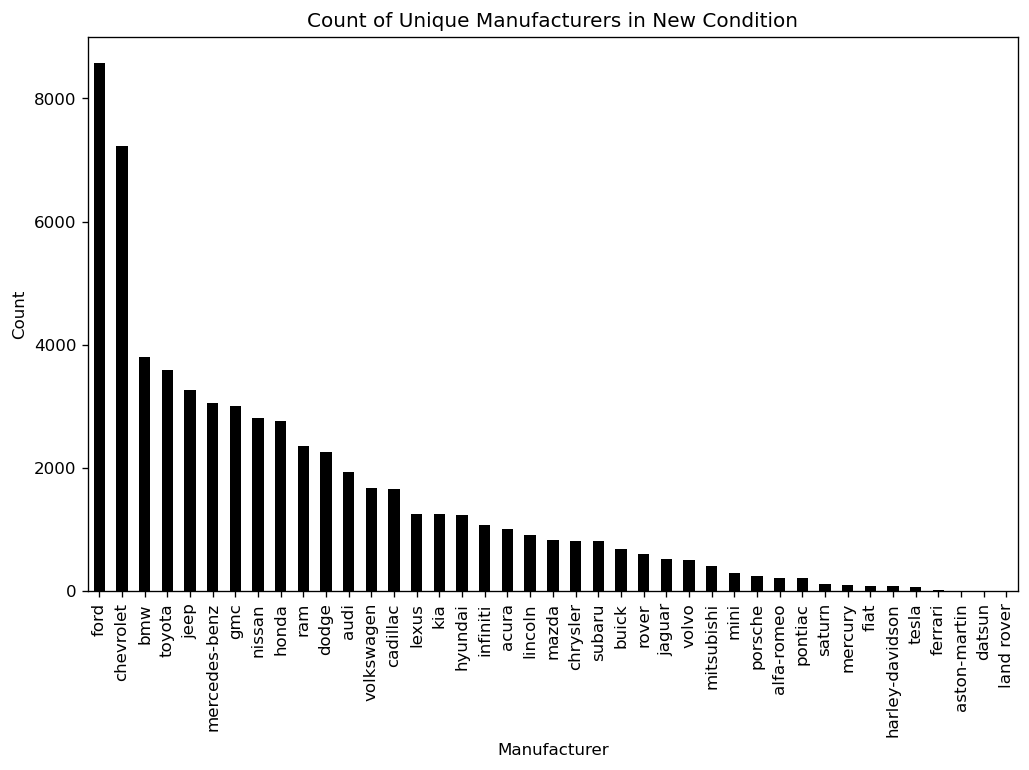

In [559]:
import pandas as pd
import matplotlib.pyplot as plt


new_condition_df = df[df['paint_color'] == 'black']

count_new = new_condition_df.groupby('manufacturer').size()
count_new = count_new.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
count_new.plot(kind='bar', color='black')

plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Count of Unique Manufacturers in New Condition')

print(count_new)
plt.show()

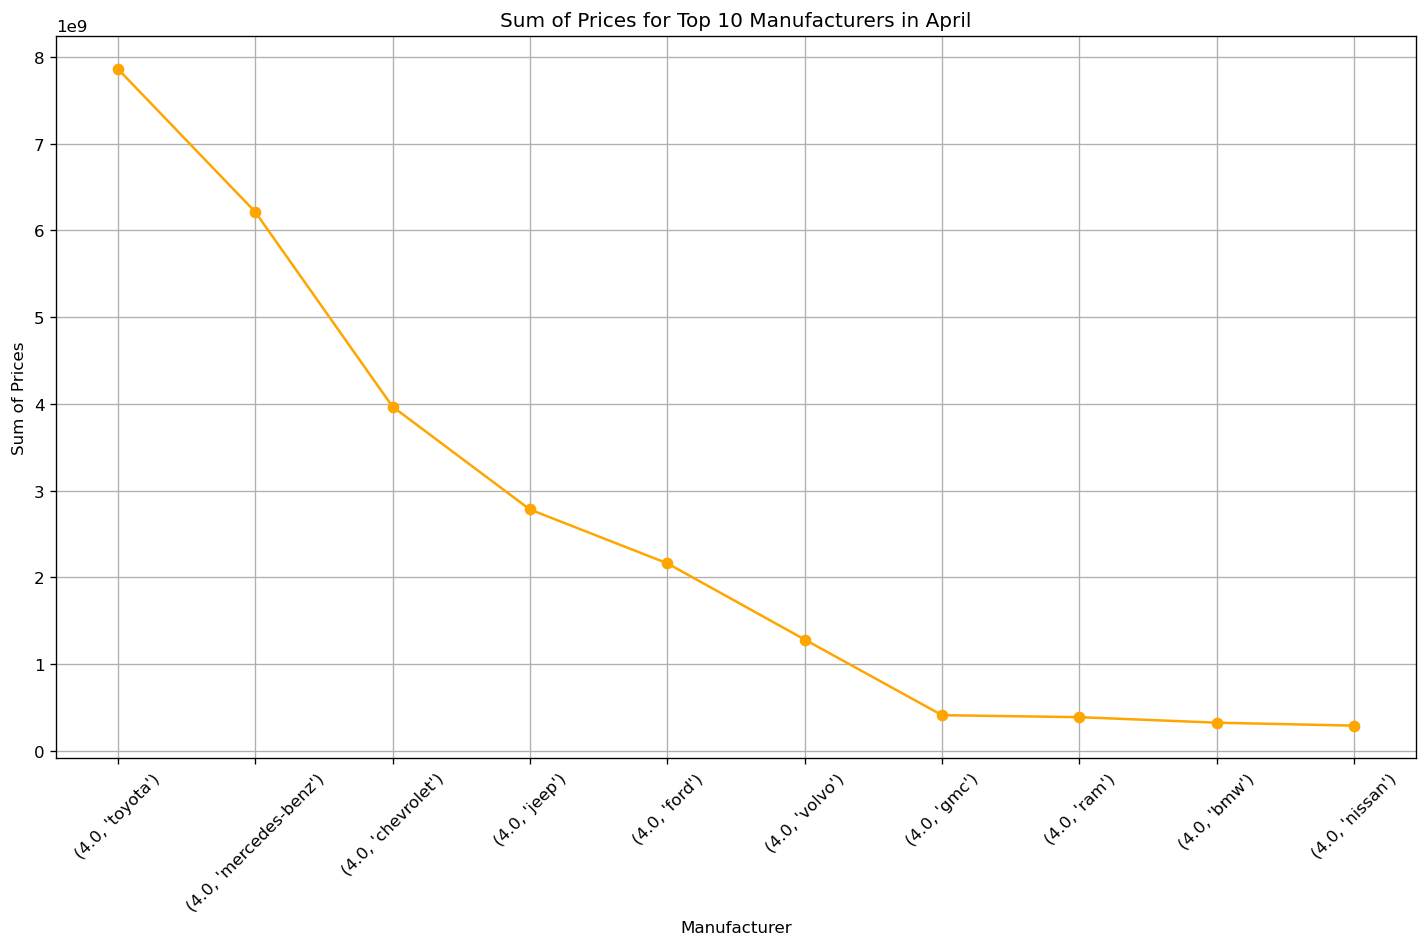

In [560]:
import pandas as pd
import matplotlib.pyplot as plt

res = df.groupby([df["posting_date"].dt.month, "manufacturer"])["price"].sum()
res = res.sort_values(ascending=False)

April = res[res.index.get_level_values(0) == 4]


top_10_manufacturers = April.head(10)


plt.figure(figsize=(12, 8))
top_10_manufacturers.plot(kind='line', marker='o', color='orange')


plt.xlabel('Manufacturer')
plt.ylabel('Sum of Prices')
plt.title('Sum of Prices for Top 10 Manufacturers in April')

plt.xticks(range(len(top_10_manufacturers.index)), top_10_manufacturers.index, rotation=45)

plt.grid(True)  
plt.tight_layout() 

plt.show()


# Vehicle Model Total Price per Day

In [563]:
import pandas as pd
import plotly.express as px


fig = px.bar(df.groupby(df["posting_date"].dt.day)["price"].mean(), x=df.groupby(df["posting_date"].dt.day)["price"].mean().index, y="price")

fig.update_layout(title="Total Price per Day", xaxis_title="Day", yaxis_title="Price")

fig.show()

In [564]:
import pandas as pd
import plotly.express as px

fig = px.bar(df.groupby(df["posting_date"].dt.month)["price"].mean(), x=df.groupby(df["posting_date"].dt.month)["price"].mean().index, y="price")

fig.update_layout(title="Total Price per Month", xaxis_title="Day", yaxis_title="Price")

fig.show()

                              region  price       year manufacturer  \
posting_year                                                          
2021-04-16                   abilene   4500 2002-01-01          bmw   
2021-04-24                   abilene   4500 2002-01-01          bmw   
2021-04-28                   abilene   9985 2014-01-01          bmw   
2021-04-05            akron   canton   6995 2011-01-01          bmw   
2021-04-08            akron   canton  14590 2012-01-01          bmw   
...                              ...    ...        ...          ...   
2021-05-04    zanesville   cambridge  28990 2017-01-01          bmw   
2021-04-19    zanesville   cambridge  36990 2018-01-01          bmw   
2021-04-19    zanesville   cambridge  31590 2018-01-01          bmw   
2021-04-11    zanesville   cambridge  32990 2018-01-01          bmw   
2021-04-11    zanesville   cambridge  33590 2018-01-01          bmw   

                                     model  condition    cylinders   fuel  \

<function matplotlib.pyplot.show(close=None, block=None)>

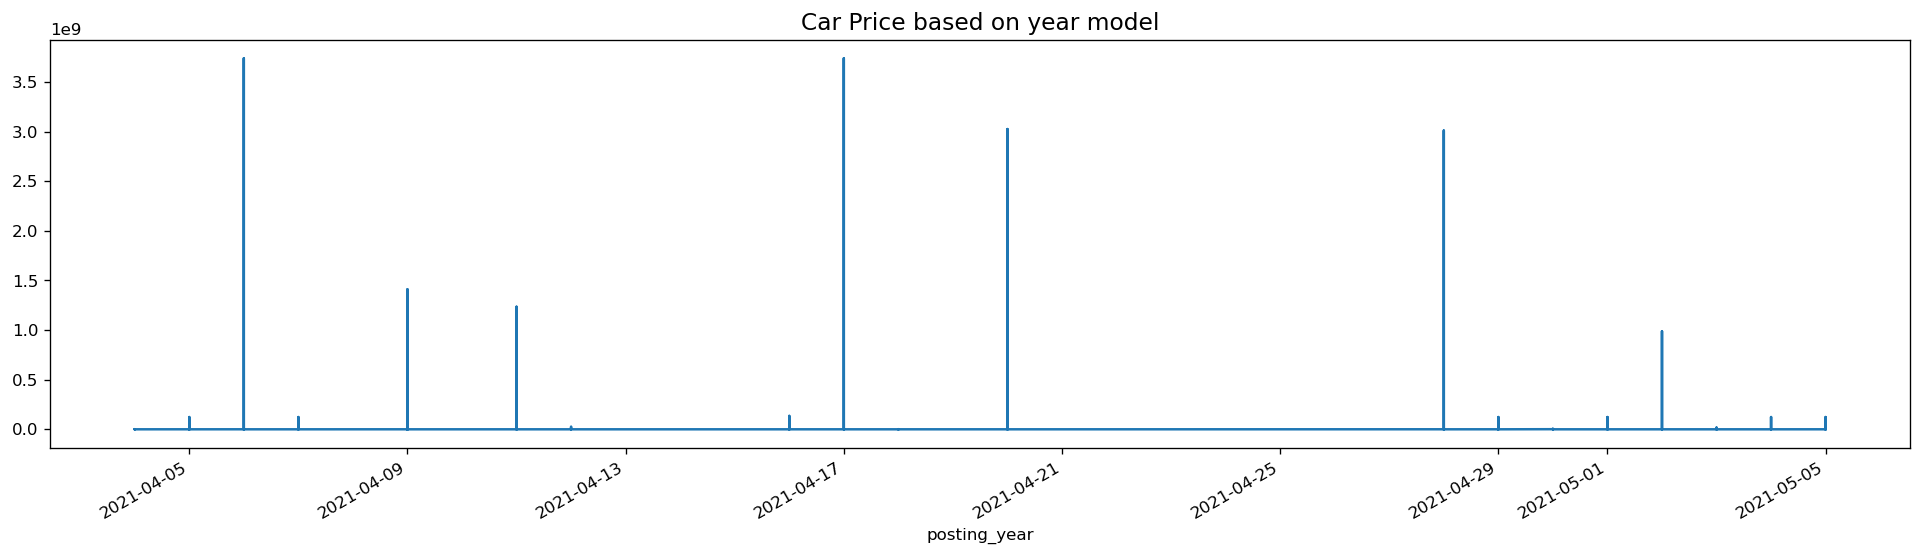

In [568]:
import pandas as pd
import matplotlib.pyplot as plt

df["posting_year"] = pd.to_datetime(df["posting_date"], format='%Y')
df.set_index('posting_year', inplace=True)

manufacturer_filter = 'bmw'
filtered_df = df[df['manufacturer'] == manufacturer_filter]

print(filtered_df)

df["price"].plot(figsize=(20, 5))

plt.title("Car Price based on year model", size=14)

plt.show

-----

In [569]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,county,state,lat,long,posting_date,removal_date,month,day
posting_year,,,,,,,,,,,,,,,,,,,,,
2021-04-16,abilene,4500,2002-01-01,bmw,x5,NaN,NaN,gas,184000.0,clean,...,NaN,NaN,NaN,tx,32.401556,-99.884713,2021-04-16,2021-05-02,4.0,2021-04-16
2021-04-24,abilene,4500,2002-01-01,bmw,x5,NaN,NaN,gas,184000.0,clean,...,NaN,NaN,NaN,tx,32.401556,-99.884713,2021-04-24,2021-04-28,4.0,2021-04-24
2021-04-23,abilene,4900,2006-01-01,toyota,camry,excellent,4 cylinders,gas,184930.0,clean,...,sedan,silver,NaN,tx,32.453848,-99.787900,2021-04-23,2021-05-25,4.0,2021-04-23
2021-04-16,abilene,6500,2008-01-01,ford,expedition,NaN,NaN,gas,206000.0,clean,...,NaN,NaN,NaN,tx,32.401556,-99.884713,2021-04-16,2021-04-26,4.0,2021-04-16
2021-04-24,abilene,6500,2008-01-01,ford,expedition,NaN,NaN,gas,206000.0,clean,...,NaN,NaN,NaN,tx,32.401556,-99.884713,2021-04-24,2021-05-12,4.0,2021-04-24


## CONTINUATION ANALYSIS

__State / Region__

1. What is the total or average listing for each state on a daily basis?<br>
2. Rank the number of states or regions that have the most cars listed.<br>
3. How long is the car listed for a particular state or region, by year, month, and day? If this is too big, then get a unique identifier for the car.<br>


In [570]:
import pandas as pd

df["posting_year"] = pd.to_datetime(df["posting_date"], format='%Y')
df.set_index('posting_year', inplace=True)

state_count = df.groupby(['posting_year', 'state']).size().reset_index(name='count')
state_count_pivot = state_count.pivot_table(index='posting_year', columns='state', values='count', fill_value=0)


print(state_count_pivot)

state          ak   al   ar    az    ca    co   ct   dc  de    fl  ...  sd  \
posting_year                                                       ...       
2021-04-04     15   88   26    38   309   116   82    0  14   176  ...   6   
2021-04-05     52  132  149    52   515   212  116    0  27   323  ...  45   
2021-04-06     44  131  110    75   530   231  183    0  34   294  ...  38   
2021-04-07    109  166  143    85   739   270  126    0  18   348  ...  55   
2021-04-08    107  196  146    76   741   204  134    0  24   404  ...  41   
2021-04-09    128  141  148    86   745   236  148    0  17   591  ...  37   
2021-04-10    136  149  101    84   699   254  150    0  24   482  ...  43   
2021-04-11     32   92   33    47   486   171  104    0  16   279  ...  12   
2021-04-12     40  163  103    75   926   215  142    0  21   572  ...  94   
2021-04-13     67  109  117    91   872   207  134    0  22   713  ...  34   
2021-04-14     98  179  176    64   755   220  152    0  75   67

In [571]:
df['state'].unique()

array(['tx', 'oh', 'ny', 'ga', 'nm', 'pa', 'ks', 'ia', 'ak', 'md', 'mi',
       'wi', 'nc', 'wv', 'ky', 'al', 'ca', 'la', 'wa', 'mn', 'or', 'ms',
       'mt', 'nd', 'va', 'in', 'il', 'id', 'nv', 'ma', 'co', 'fl', 'sc',
       'tn', 'nj', 'mo', 'sd', 'de', 'ne', 'ut', 'ok', 'ar', 'az', 'ct',
       'hi', 'me', 'nh', 'ri', 'vt', 'dc', 'wy'], dtype=object)

In [572]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


new_condition_df = df[df['state'] == 'tx']

count_new = new_condition_df.groupby('manufacturer').size()
count_new = count_new.sort_values(ascending=False)


fig = px.bar(count_new, x=count_new.index, y=count_new.values, color=count_new.index,
             labels={'x': 'Manufacturer', 'y': 'Count'}, title='Count of Unique Manufacturers base on State')

fig.show()



In [536]:
df['region'].unique()

array(['abilene', 'akron   canton', 'albany', 'albuquerque',
       'clovis   portales', 'lehigh valley', 'altoona-johnstown',
       'amarillo', 'southwest KS', 'ames', 'anchorage   mat-su',
       'annapolis', 'ann arbor', 'appleton-oshkosh-FDL', 'asheville',
       'ashtabula', 'athens', 'west virginia (old)', 'huntington-ashland',
       'atlanta', 'auburn', 'augusta', 'austin', 'bakersfield',
       'baltimore', 'baton rouge', 'battle creek',
       'beaumont   port arthur', 'bellingham', 'bemidji', 'bend',
       'bowling green', 'birmingham', 'meridian', 'southwest TX',
       'billings', 'binghamton', 'bismarck', 'eastern montana',
       'new river valley', 'bloomington', 'bloomington-normal', 'boise',
       'elko', 'boone', 'boston', 'boulder', 'eastern CO', 'bozeman',
       'brainerd', 'brownsville', 'brunswick', 'buffalo', 'butte',
       'cape cod   islands', 'southern illinois', 'catskills',
       'cedar rapids', 'central louisiana', 'deep east texas',
       'central 

In [573]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


new_condition_df = df[df['region'] == 'victoria']

count_new = new_condition_df.groupby('manufacturer').size()
count_new = count_new.sort_values(ascending=False)


fig = px.bar(count_new, x=count_new.index, y=count_new.values, color=count_new.index,
             labels={'x': 'Manufacturer', 'y': 'Count'}, title='Count of Unique Manufacturers base on State')

fig.show()

# Conclusion:

<font color=grey>In this project, I encountered various challenges related to time series analysis and forecasting. The areas that required attention were Time Series Patterns, Statsmodels.tsa seasonal decomposition, Stationary and Non-Stationary Time Series, ARIMA modeling, and Forecasting. Through dedicated effort and exploration, I had difficulty executing different codes and, a couple of times, lost the dataframe and restarted again. Nonetheless, I understand the requirement on the aspect of analyzing the data for Vehicle listing, and I work my effort on the areas I can execute. </font>

__Key Learnings:__

<font color=grey>This project has been a valuable learning experience, providing me with several key takeaways: </font>

<font color=grey>1. Different Time Series Models: In this case study, I have learned how complex this is, but on the other hand, how this is very helpful for organizations. I have gained knowledge of the use of forecasting, patterns, and other time series techniques.<br> 

<font color=grey>2. ARIMA Modeling: For forecasting tasks, I understand the importance of choosing appropriate model orders (p, d, and q) based on the characteristics of the data. Again, I need to properly execute this section moving forward.<br> </font>

<font color=grey>3. Practical Applications: I have experienced the real-world relevance of data analysis and forecasting in making data-driven decisions for future planning and strategizing, but using other application tools such as SQL, data visualizations, etc.<br></font>

<font color=grey>4. Iterative Approach: The iterative nature of time series analysis has taught me the value of persistence and continuous refinement in achieving better results.<br></font>

<font color=grey>Moving forward, I am eager to explore more advanced time series forecasting techniques and the realm of machine learning models for time series prediction. I understand that time series analysis is a continuously evolving field, and I am committed to staying updated with the latest research and techniques to enhance my skills and tackle more complex time series challenges in the future.<br></font>

<font color=grey>Overall, this project has been a rewarding experience, and I look forward to applying my learnings to new data analysis and forecasting endeavors.<br></font>



____

__END HERE__